In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Credit card fraud EDA & FS_1')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,month,year,is_fraud
0,Conroy Balistreri Gorczany,health_fitness,20.16,F,35737 Kirby Fall Suite 409,Vanderbilt,PA,15486,40.0246,-79.6955,2303,Physiotherapist,1356114025,37,12,2019,1
1,Murray Smitham,grocery_pos,291.51,M,69459 Rachel Prairie Apt. 850,Ironton,OH,45638,38.5294,-82.6654,21635,Geochemist,1326022864,23,1,2019,1
2,Boyer PLC,shopping_net,907.77,F,084 Holmes Avenue Suite 206,Stayton,OR,97383,44.8021,-122.7624,9587,Engineer,1385474317,56,11,2020,1
3,Kunde Sanford,misc_net,745.05,M,5942 Thomas Park,Craig,AK,99921,55.4732,-133.1171,1920,Commissioning editor,1386023174,27,12,2020,1
4,Huel Ltd,misc_net,890.93,F,298 Kayla Lights,Bristol,PA,19007,40.1159,-74.8536,21125,Administrator,1383615539,39,11,2020,1


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder=LabelEncoder()

In [5]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'age', 'month',
       'year', 'is_fraud'],
      dtype='object')

In [6]:
categorical_columns = ['category', 'gender','city','state','job','merchant','street']
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [7]:
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,month,year,is_fraud
0,101,5,20.16,0,371,837,38,15486,40.0246,-79.6955,2303,290,1356114025,37,12,2019,1
1,447,4,291.51,1,701,379,35,45638,38.5294,-82.6654,21635,169,1326022864,23,1,2019,1
2,71,11,907.77,0,82,783,37,97383,44.8021,-122.7624,9587,132,1385474317,56,11,2020,1
3,351,8,745.05,1,611,180,0,99921,55.4732,-133.1171,1920,88,1386023174,27,12,2020,1
4,271,8,890.93,0,309,97,38,19007,40.1159,-74.8536,21125,4,1383615539,39,11,2020,1


In [8]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Checking The Most Important Features 

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

In [10]:
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
feature_importances_df

,feature,importance
2,amt,0.662001
1,category,0.105973
12,unix_time,0.033947
13,age,0.023450
10,city_pop,0.020348
0,merchant,0.020325
4,street,0.017722
5,city,0.017272
11,job,0.016500
14,month,0.016455


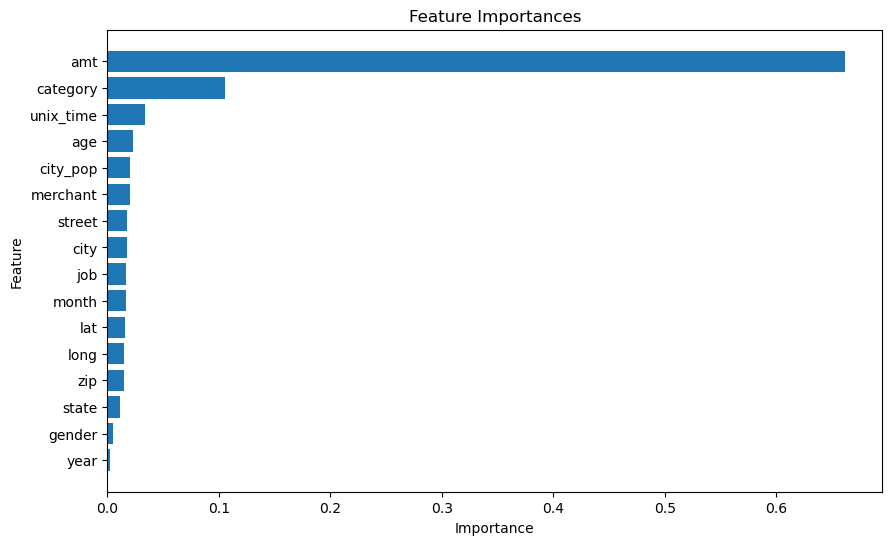

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


<Axes: >

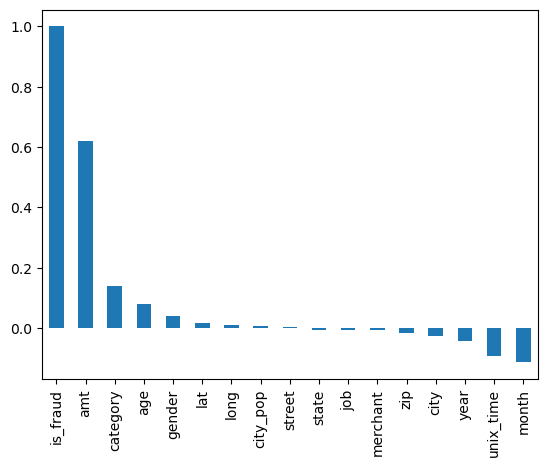

In [12]:
df.corr()['is_fraud'].sort_values(ascending=False).plot(kind='bar')

In [13]:
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,month,year,is_fraud
0,101,5,20.16,0,371,837,38,15486,40.0246,-79.6955,2303,290,1356114025,37,12,2019,1
1,447,4,291.51,1,701,379,35,45638,38.5294,-82.6654,21635,169,1326022864,23,1,2019,1
2,71,11,907.77,0,82,783,37,97383,44.8021,-122.7624,9587,132,1385474317,56,11,2020,1
3,351,8,745.05,1,611,180,0,99921,55.4732,-133.1171,1920,88,1386023174,27,12,2020,1
4,271,8,890.93,0,309,97,38,19007,40.1159,-74.8536,21125,4,1383615539,39,11,2020,1


In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [15]:
X=df.iloc[:,:-1]
y=df['is_fraud']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.20)

In [16]:
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,month,year,is_fraud
0,101,5,20.16,0,371,837,38,15486,40.0246,-79.6955,2303,290,1356114025,37,12,2019,1
1,447,4,291.51,1,701,379,35,45638,38.5294,-82.6654,21635,169,1326022864,23,1,2019,1
2,71,11,907.77,0,82,783,37,97383,44.8021,-122.7624,9587,132,1385474317,56,11,2020,1
3,351,8,745.05,1,611,180,0,99921,55.4732,-133.1171,1920,88,1386023174,27,12,2020,1
4,271,8,890.93,0,309,97,38,19007,40.1159,-74.8536,21125,4,1383615539,39,11,2020,1


In [17]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

## MODEL EVALUATION ON TRAIN AND TEST DATA.

## USING ML CLASSIFICATION ALGORITHMS

In [18]:
classifiers = {
    'LogisticRegression': (LogisticRegression(), {'C': np.logspace(-4, 4, 20)}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100, 200]}),
    'KNeighbors': (KNeighborsClassifier(), {'n_neighbors': list(range(1, 31))}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': list(range(1, 11))}),
    'NaiveBayes': (GaussianNB(), {}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2, 0.3]})
}

results = []

for name, (model, param_grid) in classifiers.items():
    print(f"Training {name}...")
    clf = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1': train_f1,
        'Test F1': test_f1,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Training LogisticRegression...
Training RandomForest...


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training KNeighbors...
Training DecisionTree...
Training NaiveBayes...


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training XGBoost...


In [23]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train Accuracy,Test Accuracy
0,LogisticRegression,0.873777,0.864611,0.859415,0.850929,0.857750,0.849234,0.859415,0.850929
1,RandomForest,1.000000,0.960427,1.000000,0.960315,1.000000,0.960308,1.000000,0.960315
2,KNeighbors,1.000000,0.848168,1.000000,0.846095,1.000000,0.845977,1.000000,0.846095
3,DecisionTree,0.975679,0.954719,0.975509,0.954465,0.975511,0.954467,0.975509,0.954465
4,NaiveBayes,0.849816,0.840878,0.812087,0.801323,0.806164,0.794684,0.812087,0.801323
5,XGBoost,0.999936,0.971020,0.999936,0.971000,0.999936,0.971001,0.999936,0.971000


## Display Confusion Matrix

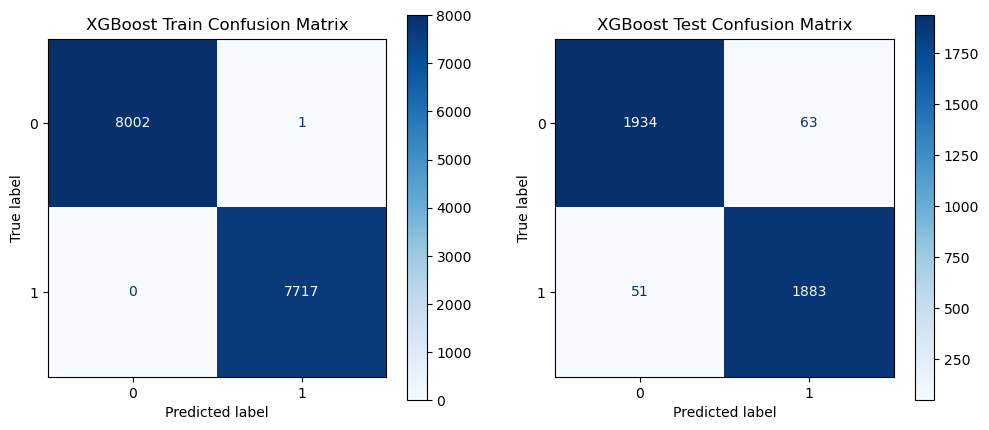

In [24]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
    
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_train).plot(ax=axs[0], cmap='Blues')
axs[0].set_title(f'{name} Train Confusion Matrix')
ConfusionMatrixDisplay(cm_test).plot(ax=axs[1], cmap='Blues')
axs[1].set_title(f'{name} Test Confusion Matrix')
plt.show()

## DL Approch to improve the acuracy.

In [25]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [28]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/100
393/393 [==============================] - 5s 6ms/step - loss: 0.6119 - accuracy: 0.6567 - val_loss: 0.4747 - val_accuracy: 0.7990
Epoch 2/100
393/393 [==============================] - 2s 5ms/step - loss: 0.4876 - accuracy: 0.7757 - val_loss: 0.4202 - val_accuracy: 0.8454
Epoch 3/100
393/393 [==============================] - 2s 5ms/step - loss: 0.4523 - accuracy: 0.8108 - val_loss: 0.4003 - val_accuracy: 0.8601
Epoch 4/100
393/393 [==============================] - 2s 5ms/step - loss: 0.4282 - accuracy: 0.8309 - val_loss: 0.3878 - val_accuracy: 0.8607
Epoch 5/100
393/393 [==============================] - 2s 4ms/step - loss: 0.4110 - accuracy: 0.8442 - val_loss: 0.3791 - val_accuracy: 0.8632
Epoch 6/100
393/393 [==============================] - 2s 4ms/step - loss: 0.4033 - accuracy: 0.8518 - val_loss: 0.3770 - val_accuracy: 0.8629
Epoch 7/100
393/393 [==============================] - 2s 4ms/step - loss: 0.3970 - accuracy: 0.8558 - val_loss: 0.3699 - val_accuracy: 0.8639

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

123/123 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9168
Test Loss: 0.2106786072254181
Test Accuracy: 0.9168150424957275


In [30]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

123/123 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1997
           1       0.98      0.85      0.91      1934

    accuracy                           0.92      3931
   macro avg       0.93      0.92      0.92      3931
weighted avg       0.92      0.92      0.92      3931



In [31]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1967   30]
 [ 297 1637]]


ROC AUC Score: 0.9687196254567995


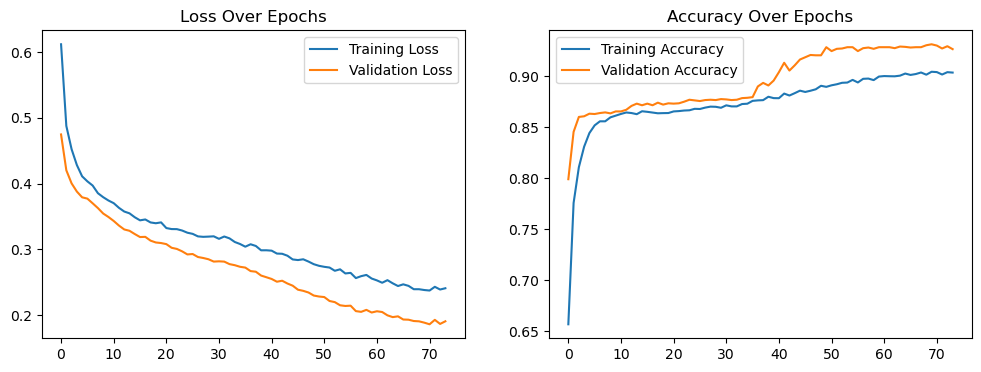

In [32]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

# THANK YOU